In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv(r'C:\Users\ARNAV\Downloads\house_price.csv')

In [3]:
house

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000
...,...,...,...,...,...,...,...
995,Bommanahalli,3,1,1460,1,2,25000
996,Whitefield,3,0,2100,1,7,28000
997,Bommanahalli,2,0,1033,5,0,16500
998,Bommanahalli,3,0,1500,10,1,22000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [5]:
house.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [6]:
# detecting for outliers
def Detect_Outliers(data):
    outliers=[]
    th=3
    for i in data:
        z=(i-np.mean(data))/np.std(data)
        if np.abs(z)>th:
            outliers.append(data)
        return outliers
Detect_Outliers(house['Price'])

[]

In [7]:
X = house.drop(columns = 'Price')

In [8]:
Y = house[['Price']]

In [9]:
X

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor
0,Bommanahalli,3,1,3000,1,3
1,Bommanahalli,3,1,1650,10,0
2,Whitefield,2,0,1000,5,3
3,Whitefield,3,0,1600,1,9
4,Whitefield,2,1,1200,5,1
...,...,...,...,...,...,...
995,Bommanahalli,3,1,1460,1,2
996,Whitefield,3,0,2100,1,7
997,Bommanahalli,2,0,1033,5,0
998,Bommanahalli,3,0,1500,10,1


In [10]:
Y

,Price
0,28000
1,18000
2,16400
3,27000
4,20000
...,...
995,25000
996,28000
997,16500
998,22000


<Figure size 1080x1080 with 0 Axes>

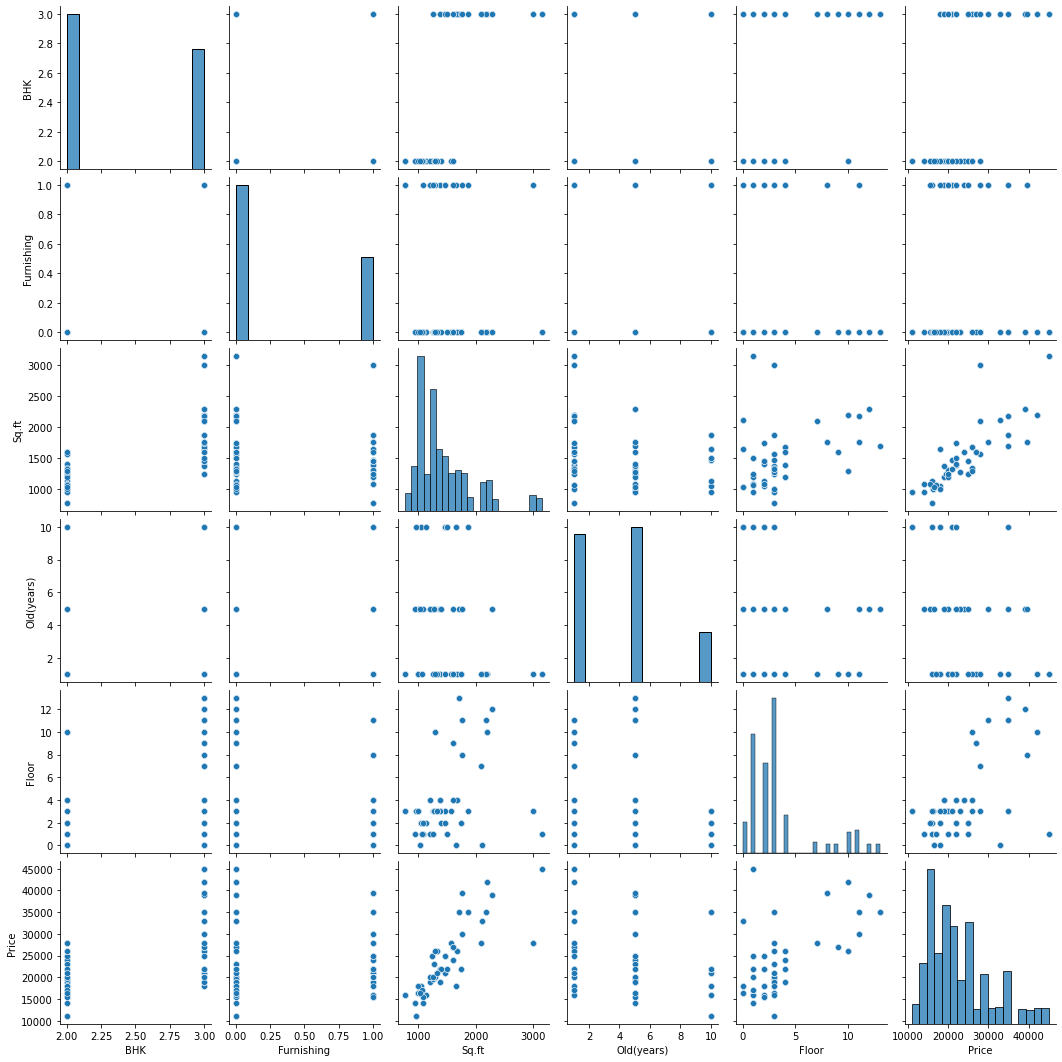

In [11]:
plt.figure(figsize=(15,15))
sns.pairplot(data=house)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [13]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['Location']),remainder='passthrough')

In [14]:
norm = MinMaxScaler()
lr = LinearRegression()
lasso = Ridge()

In [15]:
from sklearn.metrics import r2_score

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 1312)
ridge = Ridge()
norm = MinMaxScaler()
pipe = make_pipeline(column_trans,norm,ridge)
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
r2_score(Y_test,Y_pred)

0.8725382071190831

In [27]:
 pipe.predict(pd.DataFrame([['Whitefield',3,1,1768,5,11]],columns=['Location', 'BHK', 'Furnishing', 'Sq.ft', 'Old(years)', 'Floor']))

array([[33896.01659335]])